# Lab 2 (02-01-2024)

This lab experiments help you master how to perform basic data analysis and preliminary data visualization.



In [50]:
Registration_Number = "22011103010"
Name = "Deepthi"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Deepthi and my roll no : 22011103010
Computer IP Address is: 10.123.163.220


## Experiment 1
Load iris dataset using scikit learn.



In [51]:
# Experiment 1
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = np.array(iris["data"])
Y = np.array(iris["target"])
category_names = iris["target_names"]
feature_names = iris["feature_names"]

In [52]:
# Description of the IRIS Dataset
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
import pandas as pd 
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(csv_url, header = None)
desc = df.describe()
print(desc)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


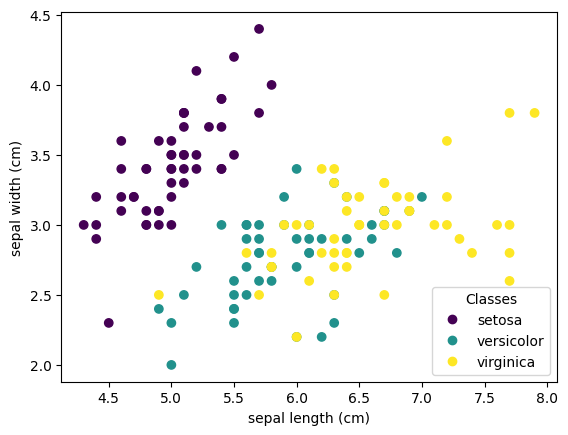

In [54]:
# Below code produces a scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set(xlabel=feature_names[0], ylabel=feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], category_names, loc="lower right", title="Classes"
)

### What is the inference from above plot?

Type your answer here:


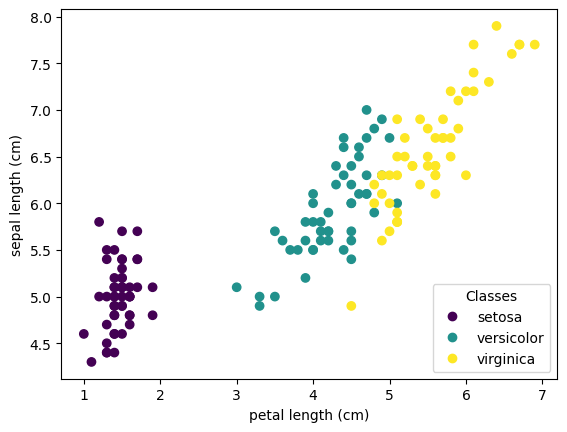

In [55]:
# Repeat the above scatter plot for all pairs of features
# 1) sepal length in cm vs petal length in cm
# 2) sepal length in cm vs petal width in cm
# 3) petal length in cm vs petal width in cm

_, ax = plt.subplots()
scatter = ax.scatter(X[:, 2], X[:, 0], c=Y)
ax.set(xlabel=feature_names[2], ylabel=feature_names[0])
_ = ax.legend(
    scatter.legend_elements()[0], category_names, loc="lower right", title="Classes"
)


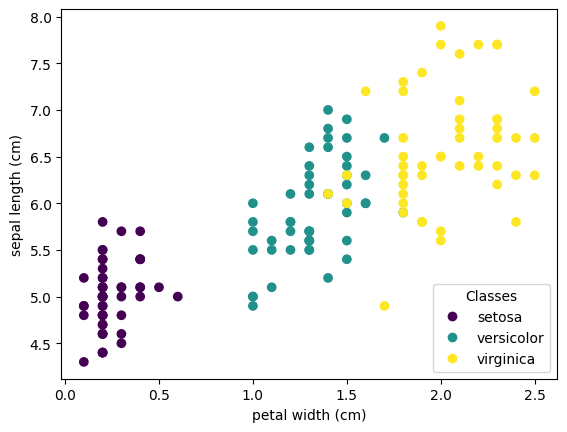

In [56]:
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 3], X[:, 0], c=Y)
ax.set(xlabel=feature_names[3], ylabel=feature_names[0])
_ = ax.legend(
    scatter.legend_elements()[0], category_names, loc="lower right", title="Classes"
)

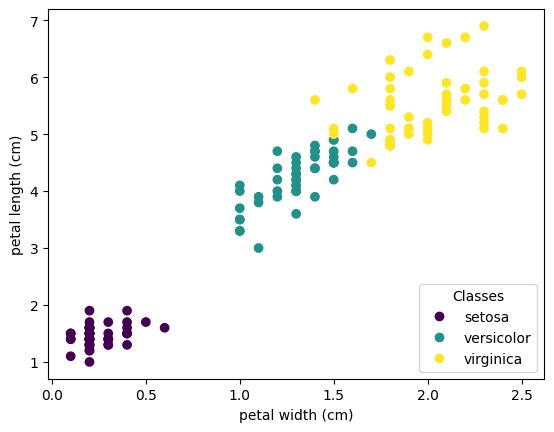

In [57]:
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 3], X[:, 2], c=Y)
ax.set(xlabel=feature_names[3], ylabel=feature_names[2])
_ = ax.legend(
    scatter.legend_elements()[0], category_names, loc="lower right", title="Classes"
)

In [58]:
# Create two new features
# sepal area = sepal length x sepal width,
# petal area = petal length x petal width
# Create new features
sepal_area = X[:, 0] * X[:, 1]
petal_area = X[:, 2] * X[:, 3]
X = np.column_stack((X, sepal_area, petal_area))

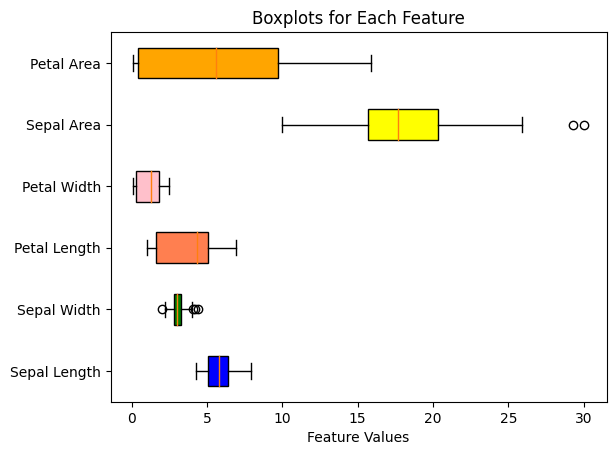

In [59]:
# Use boxplot for each feature plot in the same plot different
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
boxplots = ax.boxplot(X, vert=False, patch_artist=True)
ax.set_yticklabels(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Sepal Area', 'Petal Area'])
ax.set_xlabel('Feature Values')
ax.set_title('Boxplots for Each Feature')
colors = ['blue', 'green', 'coral', 'pink', 'yellow', 'orange']
for box, color in zip(boxplots['boxes'], colors):
    box.set_facecolor(color)

plt.show()


In [60]:
# Find the average of each feature (including petal area, sepal area) for each class
# and compare with the average of the complete dataset
import numpy as np

data_with_labels = np.column_stack((X, Y))

unique_classes = np.unique(Y)

class_averages = {}
for class_label in unique_classes:
    class_data = data_with_labels[data_with_labels[:, -1] == class_label]
    class_averages[class_label] = np.mean(class_data[:, :-1], axis=0)

overall_average = np.mean(X, axis=0)

print("Class-wise averages:")
for class_label, avg_values in class_averages.items():
    print(f"Class {int(class_label)}: {avg_values}")

print("\nOverall average:")
print(overall_average)


Class-wise averages:
Class 0: [ 5.006   3.428   1.462   0.246  17.2578  0.3656]
Class 1: [ 5.936   2.77    4.26    1.326  16.5262  5.7204]
Class 2: [ 6.588   2.974   5.552   2.026  19.6846 11.2962]

Overall average:
[ 5.84333333  3.05733333  3.758       1.19933333 17.82286667  5.79406667]


In [61]:
!pip install statsmodels

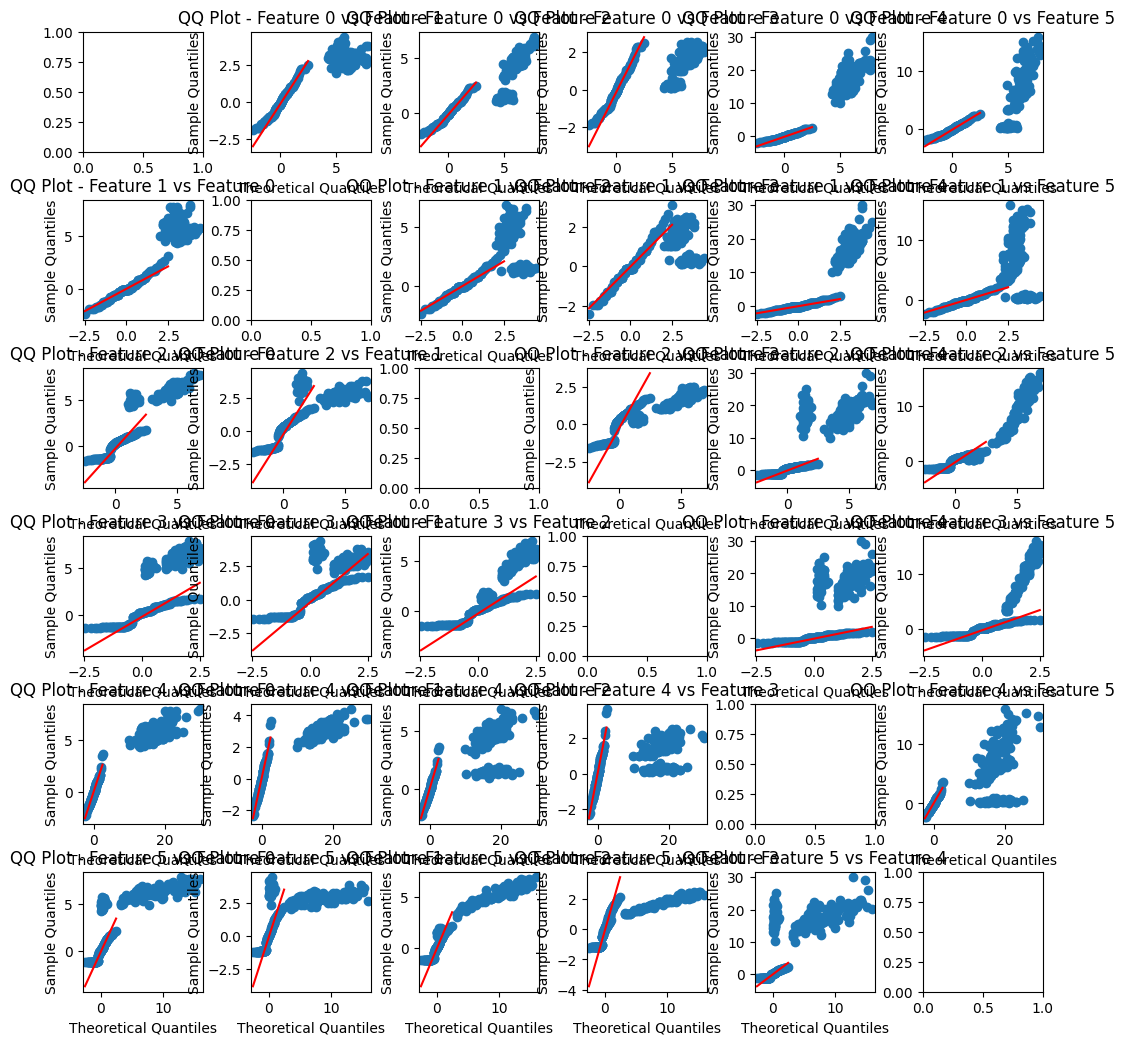

In [62]:
# Check what is QQ plot and plot pair of features
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


num_features = X.shape[1]

fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            # Scatter plot for pairs of features
            axes[i, j].scatter(X[:, i], X[:, j])
            axes[i, j].set_xlabel(f'Feature {i}')
            axes[i, j].set_ylabel(f'Feature {j}')

            # QQ plot for each feature against a normal distribution
            sm.qqplot(X[:, i], line='q', ax=axes[i, j], fit=True)
            axes[i, j].set_title(f'QQ Plot - Feature {i} vs Feature {j}')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


## Experiment 2

Load Melbourne housing dataset supplied alongwith. The filename is "real_estate.csv" file. You may use either pandas or numpy.

In [63]:
import pandas as pd
file_path = "real_estate.csv"
df = pd.read_csv(file_path)
print(df.head())


            Address  Rooms    Price  Bedroom2  Bathroom  Landsize  YearBuilt  \
0      85 Turner St      2  1480000         2         1       202        NaN   
1   25 Bloomburg St      2  1035000         2         1       156     1900.0   
2      5 Charles St      3  1465000         3         2       134     1900.0   
3  40 Federation La      3   850000         3         2        94        NaN   
4       55a Park St      4  1600000         3         1       120     2014.0   

              Regionname      Suburb Type  
0  Northern Metropolitan  Abbotsford    h  
1  Northern Metropolitan  Abbotsford    h  
2  Northern Metropolitan  Abbotsford    h  
3  Northern Metropolitan  Abbotsford    h  
4  Northern Metropolitan  Abbotsford    h  


### Unique Identifier
- Address (replace the address with a unique number)
### Features of the dataset
- Rooms
- Price
- Number of Bedrooms
- Number of Bathrooms
- Land size
- Year built
- Region name
- Sub urban name
### Target variable (output variable t)
- Type of House
  - h - house, cottage, villa, semi, terrace
  - u - unit, duplex
  - t - townhouse

In the above dataset,
- Convert the "Year built" into a categorical data
  - the houses built before 1800 is given 8
  - the houses built from 1800 to 1850 is given 7
  - the houses build from 1850 to 1900 is given 6
  - the houses built between 1900 to 1920 is given as 5
  - the houses built between 1920 to 1950 is given as 4
  - the houses built between 1950 to 1980 is given as 3
  - the houses built between 1980 to 2000 is given as 2
  - the houses built between 2000 to 2023 is given as 1
  - if there is no data on house built consider it as 0
- Use normalization techniques used in previous lab for "price" and "lab-size"?
- Choose any one "Region name" for that answer following questions
  - Which is the dominant house-type?
  - what is the average cost of different types of house?
  - Use scatter plot for the following pair of features
    - price vs number of bedrooms
    - price vs number of bathrooms
    - land size vs price

In [64]:

def categorize_year_built(year):
    if year < 1800:
        return 8
    elif 1800 <= year <= 1850:
        return 7
    elif 1850 <= year <= 1900:
        return 6
    elif 1900 <= year <= 1920:
        return 5
    elif 1920 <= year <= 1950:
        return 4
    elif 1950 <= year <= 1980:
        return 3
    elif 1980 <= year <= 2000:
        return 2
    elif 2000 <= year <= 2023:
        return 1
    else:
        return 0
df['Year_built_categorical'] = df['YearBuilt'].apply(categorize_year_built)


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Price', 'Landsize']] = scaler.fit_transform(df[['Price', 'Landsize']])


In [66]:
region_df = df[df['Regionname'] == 'Region_1']

In [67]:

dominant_house_type_numerical = df['Type'].mode().iloc[0]
print(f"Dominant House Type (Numerical): {dominant_house_type_numerical}")



Dominant House Type (Numerical): h


In [68]:
average_cost_by_type = df.groupby('Type')['Price'].mean()
print(f"Average Cost of Different House Types in Region_1:\n{average_cost_by_type}")


Average Cost of Different House Types in Region_1:
Type
h    0.129856
t    0.095203
u    0.058343
Name: Price, dtype: float64


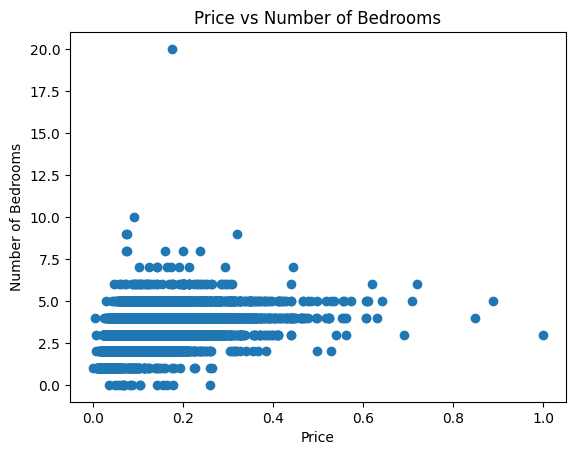

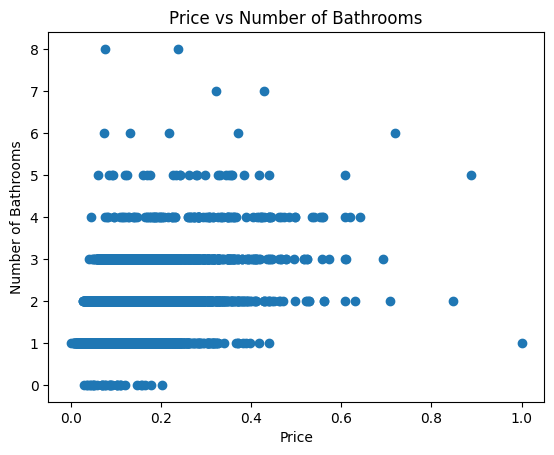

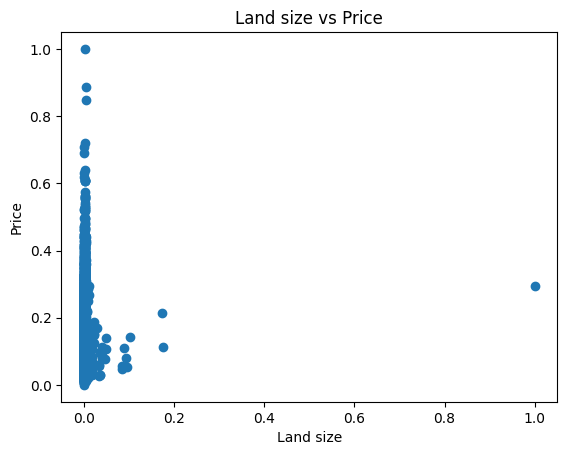

In [69]:
import matplotlib.pyplot as plt


plt.scatter(df['Price'], df['Bedroom2'])
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title('Price vs Number of Bedrooms')
plt.show()

plt.scatter(df['Price'], df['Bathroom'])
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')
plt.title('Price vs Number of Bathrooms')
plt.show()

plt.scatter(df['Landsize'], df['Price'])
plt.xlabel('Land size')
plt.ylabel('Price')
plt.title('Land size vs Price')
plt.show()


## Covariance matrix
Create a numpy array with 3 features land size, price, number of bedrooms. the size of the array will be 3xN. N is the number of samples.

An example of how to find the covariance matrix is given below:

In [70]:
import numpy as np
# Here number of samples is 5 and 3 features
x1 = [4.01, -10.2,  -4.3, 8.4, 3.1] # feature 1
x2 = [2.3,  11.1,  6.12, -0.123, 0.97] # feature 2
x3 = [9.0, 7.1, -7.1, -9.87, 6.23] # feature 3
X = np.stack((x1, x2, x3), axis=0)
np.cov(X)
# This gives the correlation between features
# A(2,3) gives the relation between feature 2 and 3
# A(2,2) gives the variance in feature 2
# Browse through and find out why this matrix is much needed in machine learning

array([[ 54.64402  , -33.1133335, -17.61943  ],
       [-33.1133335,  20.9868728,  10.3704215],
       [-17.61943  ,  10.3704215,  78.07597  ]])

### Find the covariance matrix for entire real_estate database.

In [71]:
numeric_columns = df.select_dtypes(include='number')
covariance_matrix = numeric_columns.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                           Rooms     Price  Bedroom2  Bathroom  Landsize  \
Rooms                   0.913454  0.034038  0.871655  0.391990  0.000226   
Price                   0.034038  0.005143  0.032968  0.023167  0.000025   
Bedroom2                0.871655  0.032968  0.933003  0.390651  0.000228   
Bathroom                0.391990  0.023167  0.390651  0.478465  0.000237   
Landsize                0.000226  0.000025  0.000228  0.000237  0.000085   
YearBuilt              -2.388385 -0.901477 -1.940503  4.010633  0.003116   
Year_built_categorical  0.046326  0.018412  0.034478 -0.033262 -0.000359   

                          YearBuilt  Year_built_categorical  
Rooms                     -2.388385                0.046326  
Price                     -0.901477                0.018412  
Bedroom2                  -1.940503                0.034478  
Bathroom                   4.010633               -0.033262  
Landsize                   0.003116               -0.000359  


## Basic linear algebra
- Find the eigen values of the covariance matrix of the entire dataset (use eigen value decomposition)
- Find the singular values of the covariance matrix of the entire dataset

In [72]:
import numpy as np

# Assuming df is your DataFrame containing the real estate data
numeric_columns = df.select_dtypes(include='number')
covariance_matrix = numeric_columns.cov()

# Eigenvalues and eigenvectors using eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Singular value decomposition
singular_values = np.linalg.svd(covariance_matrix, compute_uv=False)

# Display the results
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

print("\nSingular Values:")
print(singular_values)


Eigenvalues:
[1.39141839e+03 1.99687287e+00 1.50112883e+00 2.45974845e-01
 5.12847740e-02 2.64571042e-03 8.47212265e-05]

Eigenvectors:
[[ 1.71771308e-03 -6.60327910e-01  7.11216096e-03 -2.22758131e-01
   7.16990742e-01 -1.47174138e-02  7.96124391e-05]
 [ 6.47937132e-04 -2.60734982e-02  9.15977346e-03  4.18905181e-02
   9.40952555e-03  9.98688637e-01 -3.67477677e-03]
 [ 1.39574984e-03 -6.66911347e-01  3.66813180e-03 -2.64766293e-01
  -6.96500259e-01  2.21862359e-04 -4.00855013e-05]
 [-2.88126935e-03 -3.42834521e-01 -1.12247950e-01  9.31118367e-01
  -2.62952393e-02 -4.67290624e-02 -3.58093614e-04]
 [-2.24801292e-06 -1.97465426e-04  1.42749802e-04  5.10656160e-04
  -6.06848941e-05  3.65226576e-03  9.99993169e-01]
 [-9.99249687e-01  1.13404405e-04 -3.79617135e-02 -7.54516477e-03
   5.57665490e-04  1.31067923e-03  2.29498786e-06]
 [ 3.85544128e-02  3.13196201e-02 -9.92880328e-01 -1.07164385e-01
   5.60097314e-03  1.43420206e-02  1.50688889e-04]]

Singular Values:
[1.39141839e+03 1.99687287